In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2
from resnets_utils import *

from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback


Using TensorFlow backend.


In [0]:
os.makedirs('images')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

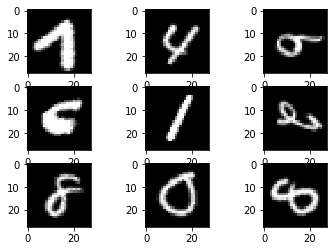

In [0]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,rotation_range=90)

from keras.datasets import mnist
from matplotlib import pyplot
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
# # reshape to be [samples][width][height][channels]
# X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
# X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# # convert from int to float
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')

# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, seed=101,batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [0]:
def central_scale_images(X_imgs, scales):
    # Various settings needed for Tensorflow operation
    boxes = np.zeros((len(scales), 4), dtype = np.float32)
    for index, scale in enumerate(scales):
        x1 = y1 = 0.5 - 0.5 * scale # To scale centrally
        x2 = y2 = 0.5 + 0.5 * scale
        boxes[index] = np.array([y1, x1, y2, x2], dtype = np.float32)
    box_ind = np.zeros((len(scales)), dtype = np.int32)
    crop_size = np.array([75, 75], dtype = np.int32)
    
    X_scale_data = []
    tf.reset_default_graph()
    X = tf.placeholder(tf.float32, shape = (1, 75, 75, 3))
    # Define Tensorflow operation for all scales but only one base image at a time
    tf_img = tf.image.crop_and_resize(X, boxes, box_ind, crop_size)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for img_data in X_imgs:
            batch_img = np.expand_dims(img_data, axis = 0)
            scaled_imgs = sess.run(tf_img, feed_dict = {X: batch_img})
            X_scale_data.extend(scaled_imgs)
    
    X_scale_data = np.array(X_scale_data, dtype = np.float32)
    return X_scale_data
	


In [0]:
# Produce each image at scaling of 90%, 75% and 60% of original image.
scaled_imgs = central_scale_images(cv2.imread(train_data_dir+'\\0\\1 img 10.jpg'), [0.90, 0.75, 0.60])


ValueError: Cannot feed value of shape (1, 70, 3) for Tensor 'Placeholder:0', which has shape '(1, 75, 75, 3)'

In [0]:
import tensorflow as tf

In [0]:
train_data_dir+'\\0\\1 img 10.jpg'

'D:\\Praxis docs\\capstone\\OCR\\datasets\\FB_50\\0'

In [0]:
path_base=r'D:\Praxis docs\capstone\OCR\datasets'

In [0]:
train_data_dir = path_base+'\\train'
validation_data_dir = path_base +'\\validation' 

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    #shear_range=0.3,
    #zoom_range=0.5,
    #fill_mode = 'constant',
    #cval = 1,
    #rotation_range = 5,
    #width_shift_range=0.5,
    #height_shift_range=0.5,
    #horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(75, 75),
    batch_size=64,
    #color_mode='rgb',
    color_mode='grayscale',
    
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(75, 75),
    batch_size=64,
    #color_mode='rgb',
    color_mode='grayscale',
    
    class_mode='categorical')


Found 222966 images belonging to 50 classes.
Found 106796 images belonging to 50 classes.


In [0]:
for root, dirs, files in os.walk(r'D:\Praxis docs\capstone\OCR\datasets\validation'):
       for fname in files:
            img=cv2.imread(root+'\\'+fname)
            im=cv2.bitwise_not(img)
            cv2.imwrite(root+'\\'+fname,im)
            
            

In [0]:
def build_model():
    #base_model = densenet.DenseNet121(input_shape=(img_width, img_height, 3),
                                     #weights='../input/full-keras-pretrained-no-top/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                     #include_top=False,
                                     #pooling='avg')
    base_model=applications.resnet50.ResNet50(weights= None, include_top=False, input_shape= (214,214,3))
    for layer in base_model.layers:
          layer.trainable = True

#     x = base_model.output
#     x = Dense(1000, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
#     x = Activation('relu')(x)
#     x = Dense(500, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
#     x = Activation('relu')(x)
#     predictions = Dense(n_classes, activation='softmax')(x)
#     model = Model(inputs=base_model.input, outputs=predictions)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    predictions = Dense(units=35, activation= 'softmax')(x)
    model = Model(inputs = base_model.input, outputs = predictions)
    
    return model

In [0]:
def build_model():
    #base_model = densenet.DenseNet121(input_shape=(img_width, img_height, 3),
                                     #weights='../input/full-keras-pretrained-no-top/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                     #include_top=False,
                                     #pooling='avg')
    base_model=applications.inception_resnet_v2.InceptionResNetV2(weights= None, include_top=False, input_shape= (214,214,1))
    for layer in base_model.layers:
          layer.trainable = True

#     x = base_model.output
#     x = Dense(1000, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
#     x = Activation('relu')(x)
#     x = Dense(500, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
#     x = Activation('relu')(x)
#     predictions = Dense(n_classes, activation='softmax')(x)
#     model = Model(inputs=base_model.input, outputs=predictions)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    predictions = Dense(units=35, activation= 'softmax')(x)
    model = Model(inputs = base_model.input, outputs = predictions)
    
    return model

In [0]:
def build_model():
    #base_model = densenet.DenseNet121(input_shape=(img_width, img_height, 3),
                                     #weights='../input/full-keras-pretrained-no-top/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                     #include_top=False,
                                     #pooling='avg')
    base_model=applications.inception_v3.InceptionV3(weights= None, include_top=False, input_shape= (75,75,1))
    for layer in base_model.layers:
          layer.trainable = True

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    
    x = Dense(1000)(x)
              #, kernel_regularizer=regularizers.l1_l2(0.01))(x)
              #activity_regularizer=regularizers.l2(0.01))(x)
    #x = Activation('relu')(x)
    #x = Dense(500, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
    #x = Activation('relu')(x)
    #x = Dense(100, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
    #x = Activation('relu')(x)
    x = Dense(500)(x)
    x = Dense(100)(x)
    x = Dense(50)(x)
    
    predictions = Dense(50, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
 #   x = base_model.output
    #x = Dropout(0.1)(x)
    
    return model

In [0]:
def build_model():
    #base_model = densenet.DenseNet121(input_shape=(img_width, img_height, 3),
                                     #weights='../input/full-keras-pretrained-no-top/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                     #include_top=False,
                                     #pooling='avg')
    base_model=applications.mobilenet.MobileNet(weights= None, include_top=False, input_shape= (75,75,1))
    for layer in base_model.layers:
          layer.trainable = True

#     x = base_model.output
#     x = Dense(1000, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
#     x = Activation('relu')(x)
#     x = Dense(500, kernel_regularizer=regularizers.l1_l2(0.01), activity_regularizer=regularizers.l2(0.01))(x)
#     x = Activation('relu')(x)
#     predictions = Dense(n_classes, activation='softmax')(x)
#     model = Model(inputs=base_model.input, outputs=predictions)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
   # x = Dropout(0.1)(x)
    predictions = Dense(units=50, activation= 'softmax')(x)
    model = Model(inputs = base_model.input, outputs = predictions)
    
    return model

In [0]:
# train_datagen.flow_from_directory(target_size=(28,28))



In [0]:
model = build_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc','mse'])

In [0]:
# import scipy
# new_shape = (28,28,3)
# X_train_new = np.empty(shape=(X_train.shape[0],)+new_shape)
# for idx in xrange(X_train.shape[0]):
#     X_train_new[idx] = scipy.misc.imresize(X_train[idx], new_shape)

In [0]:
# X_data_resized = [skimage.transform.resize(image, new_shape) for image in X_data]

In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 75, 75, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 37, 37, 32)   288         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 37, 37, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 37, 37, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

__________________________________________________________________________________________________
mixed0 (Concatenate)            (None, 7, 7, 256)    0           activation_6[0][0]               
                                                                 activation_8[0][0]               
                                                                 activation_11[0][0]              
                                                                 activation_12[0][0]              
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 7, 7, 64)     16384       mixed0[0][0]                     
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 7, 7, 64)     192         conv2d_16[0][0]                  
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
batch_normalization_20 (BatchNo (None, 7, 7, 64)     192         conv2d_20[0][0]                  
__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, 7, 7, 64)     192         conv2d_22[0][0]                  
__________________________________________________________________________________________________
batch_normalization_25 (BatchNo (None, 7, 7, 96)     288         conv2d_25[0][0]                  
__________________________________________________________________________________________________
batch_normalization_26 (BatchNo (None, 7, 7, 64)     192         conv2d_26[0][0]                  
__________________________________________________________________________________________________
activation_20 (Activation)      (None, 7, 7, 64)     0           batch_normalization_20[0][0]     
__________

batch_normalization_38 (BatchNo (None, 3, 3, 128)    384         conv2d_38[0][0]                  
__________________________________________________________________________________________________
activation_33 (Activation)      (None, 3, 3, 128)    0           batch_normalization_33[0][0]     
__________________________________________________________________________________________________
activation_38 (Activation)      (None, 3, 3, 128)    0           batch_normalization_38[0][0]     
__________________________________________________________________________________________________
average_pooling2d_4 (AveragePoo (None, 3, 3, 768)    0           mixed3[0][0]                     
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 3, 3, 192)    147456      mixed3[0][0]                     
__________________________________________________________________________________________________
conv2d_34 

__________________________________________________________________________________________________
batch_normalization_41 (BatchNo (None, 3, 3, 192)    576         conv2d_41[0][0]                  
__________________________________________________________________________________________________
batch_normalization_44 (BatchNo (None, 3, 3, 192)    576         conv2d_44[0][0]                  
__________________________________________________________________________________________________
batch_normalization_49 (BatchNo (None, 3, 3, 192)    576         conv2d_49[0][0]                  
__________________________________________________________________________________________________
batch_normalization_50 (BatchNo (None, 3, 3, 192)    576         conv2d_50[0][0]                  
__________________________________________________________________________________________________
activation_41 (Activation)      (None, 3, 3, 192)    0           batch_normalization_41[0][0]     
__________

activation_60 (Activation)      (None, 3, 3, 192)    0           batch_normalization_60[0][0]     
__________________________________________________________________________________________________
mixed6 (Concatenate)            (None, 3, 3, 768)    0           activation_51[0][0]              
                                                                 activation_54[0][0]              
                                                                 activation_59[0][0]              
                                                                 activation_60[0][0]              
__________________________________________________________________________________________________
conv2d_65 (Conv2D)              (None, 3, 3, 192)    147456      mixed6[0][0]                     
__________________________________________________________________________________________________
batch_normalization_65 (BatchNo (None, 3, 3, 192)    576         conv2d_65[0][0]                  
__________

batch_normalization_74 (BatchNo (None, 3, 3, 192)    576         conv2d_74[0][0]                  
__________________________________________________________________________________________________
activation_74 (Activation)      (None, 3, 3, 192)    0           batch_normalization_74[0][0]     
__________________________________________________________________________________________________
conv2d_71 (Conv2D)              (None, 3, 3, 192)    147456      mixed7[0][0]                     
__________________________________________________________________________________________________
conv2d_75 (Conv2D)              (None, 3, 3, 192)    258048      activation_74[0][0]              
__________________________________________________________________________________________________
batch_normalization_71 (BatchNo (None, 3, 3, 192)    576         conv2d_71[0][0]                  
__________________________________________________________________________________________________
batch_norm

activation_84 (Activation)      (None, 1, 1, 384)    0           batch_normalization_84[0][0]     
__________________________________________________________________________________________________
batch_normalization_85 (BatchNo (None, 1, 1, 192)    576         conv2d_85[0][0]                  
__________________________________________________________________________________________________
activation_77 (Activation)      (None, 1, 1, 320)    0           batch_normalization_77[0][0]     
__________________________________________________________________________________________________
mixed9_0 (Concatenate)          (None, 1, 1, 768)    0           activation_79[0][0]              
                                                                 activation_80[0][0]              
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 1, 1, 768)    0           activation_83[0][0]              
          

                                                                 mixed9_1[0][0]                   
                                                                 concatenate_2[0][0]              
                                                                 activation_94[0][0]              
__________________________________________________________________________________________________
global_average_pooling2d_1 (Glo (None, 2048)         0           mixed10[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1000)         2049000     global_average_pooling2d_1[0][0] 
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 500)          500500      dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (D

In [0]:
early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4)
callbacks_list = [early_stop, reduce_lr]

In [0]:
model_history = model.fit_generator(
    
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=106796 // 32,
    callbacks=callbacks_list,
    steps_per_epoch=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
100/100 [==============================] - ETA: 39:10 - loss: 5.0172 - acc: 0.0312 - mean_squared_error: 0.020 - ETA: 20:25 - loss: 9.3240 - acc: 0.0312 - mean_squared_error: 0.026 - ETA: 14:07 - loss: 10.4141 - acc: 0.0208 - mean_squared_error: 0.02 - ETA: 11:00 - loss: 10.7259 - acc: 0.0312 - mean_squared_error: 0.02 - ETA: 9:08 - loss: 10.6638 - acc: 0.0375 - mean_squared_error: 0.0283 - ETA: 8:03 - loss: 10.3164 - acc: 0.0417 - mean_squared_error: 0.027 - ETA: 7:07 - loss: 9.9166 - acc: 0.0424 - mean_squared_error: 0.027 - ETA: 6:25 - loss: 9.4010 - acc: 0.0391 - mean_squared_error: 0.02 - ETA: 5:51 - loss: 9.0526 - acc: 0.0417 - mean_squared_error: 0.02 - ETA: 5:25 - loss: 8.6747 - acc: 0.0375 - mean_squared_error: 0.02 - ETA: 5:03 - loss: 8.3687 - acc: 0.0355 - mean_squared_error: 0.02 - ETA: 4:44 - loss: 8.1367 - acc: 0.0352 - mean_squared_error: 0.02 - ETA: 4:28 - loss: 7

100/100 [==============================] - ETA: 4:05 - loss: 4.0481 - acc: 0.0781 - mean_squared_error: 0.01 - ETA: 3:09 - loss: 3.9013 - acc: 0.0859 - mean_squared_error: 0.01 - ETA: 2:53 - loss: 3.9829 - acc: 0.0729 - mean_squared_error: 0.01 - ETA: 2:54 - loss: 3.9789 - acc: 0.0781 - mean_squared_error: 0.01 - ETA: 2:44 - loss: 3.9787 - acc: 0.0781 - mean_squared_error: 0.01 - ETA: 2:39 - loss: 4.0210 - acc: 0.0807 - mean_squared_error: 0.01 - ETA: 2:34 - loss: 4.0338 - acc: 0.0759 - mean_squared_error: 0.01 - ETA: 2:29 - loss: 4.0955 - acc: 0.0664 - mean_squared_error: 0.01 - ETA: 2:25 - loss: 4.0759 - acc: 0.0677 - mean_squared_error: 0.01 - ETA: 2:21 - loss: 4.0482 - acc: 0.0719 - mean_squared_error: 0.01 - ETA: 2:23 - loss: 4.0575 - acc: 0.0739 - mean_squared_error: 0.01 - ETA: 2:23 - loss: 4.0630 - acc: 0.0677 - mean_squared_error: 0.01 - ETA: 2:19 - loss: 4.0453 - acc: 0.0697 - mean_squared_error: 0.01 - ETA: 2:16 - loss: 4.0354 - acc: 0.0658 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 3:11 - loss: 3.8540 - acc: 0.0469 - mean_squared_error: 0.01 - ETA: 2:40 - loss: 3.6985 - acc: 0.1094 - mean_squared_error: 0.01 - ETA: 2:29 - loss: 3.7074 - acc: 0.0885 - mean_squared_error: 0.01 - ETA: 2:21 - loss: 3.7485 - acc: 0.0898 - mean_squared_error: 0.01 - ETA: 2:15 - loss: 3.7546 - acc: 0.0938 - mean_squared_error: 0.01 - ETA: 2:12 - loss: 3.7850 - acc: 0.0885 - mean_squared_error: 0.01 - ETA: 2:08 - loss: 3.7985 - acc: 0.0804 - mean_squared_error: 0.01 - ETA: 2:06 - loss: 3.7904 - acc: 0.0801 - mean_squared_error: 0.01 - ETA: 2:04 - loss: 3.7579 - acc: 0.0868 - mean_squared_error: 0.01 - ETA: 2:03 - loss: 3.7856 - acc: 0.0813 - mean_squared_error: 0.01 - ETA: 2:01 - loss: 3.7694 - acc: 0.0838 - mean_squared_error: 0.01 - ETA: 1:59 - loss: 3.7626 - acc: 0.0820 - mean_squared_error: 0.01 - ETA: 1:57 - loss: 3.7481 - acc: 0.0829 - mean_squared_error: 0.01 - ETA: 1:57 - loss: 3.7410 - acc: 0.0882 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 2:14 - loss: 3.5826 - acc: 0.0781 - mean_squared_error: 0.01 - ETA: 2:16 - loss: 3.7103 - acc: 0.0781 - mean_squared_error: 0.01 - ETA: 2:12 - loss: 3.6949 - acc: 0.0781 - mean_squared_error: 0.01 - ETA: 2:11 - loss: 3.6720 - acc: 0.0898 - mean_squared_error: 0.01 - ETA: 2:10 - loss: 3.6155 - acc: 0.0969 - mean_squared_error: 0.01 - ETA: 2:09 - loss: 3.6081 - acc: 0.0911 - mean_squared_error: 0.01 - ETA: 2:06 - loss: 3.6114 - acc: 0.0915 - mean_squared_error: 0.01 - ETA: 2:04 - loss: 3.6194 - acc: 0.0879 - mean_squared_error: 0.01 - ETA: 2:08 - loss: 3.6142 - acc: 0.0903 - mean_squared_error: 0.01 - ETA: 2:06 - loss: 3.6217 - acc: 0.0891 - mean_squared_error: 0.01 - ETA: 2:04 - loss: 3.6216 - acc: 0.0895 - mean_squared_error: 0.01 - ETA: 2:01 - loss: 3.6126 - acc: 0.0859 - mean_squared_error: 0.01 - ETA: 1:59 - loss: 3.6108 - acc: 0.0889 - mean_squared_error: 0.01 - ETA: 2:00 - loss: 3.6268 - acc: 0.0882 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 2:12 - loss: 4.0024 - acc: 0.0469 - mean_squared_error: 0.02 - ETA: 2:07 - loss: 3.7613 - acc: 0.0938 - mean_squared_error: 0.01 - ETA: 2:06 - loss: 3.6585 - acc: 0.0990 - mean_squared_error: 0.01 - ETA: 2:02 - loss: 3.6467 - acc: 0.0938 - mean_squared_error: 0.01 - ETA: 2:01 - loss: 3.6840 - acc: 0.0875 - mean_squared_error: 0.01 - ETA: 1:59 - loss: 3.6604 - acc: 0.0885 - mean_squared_error: 0.01 - ETA: 1:58 - loss: 3.6169 - acc: 0.0871 - mean_squared_error: 0.01 - ETA: 1:58 - loss: 3.5884 - acc: 0.1055 - mean_squared_error: 0.01 - ETA: 2:00 - loss: 3.5955 - acc: 0.1146 - mean_squared_error: 0.01 - ETA: 1:59 - loss: 3.5812 - acc: 0.1141 - mean_squared_error: 0.01 - ETA: 1:57 - loss: 3.5781 - acc: 0.1108 - mean_squared_error: 0.01 - ETA: 1:55 - loss: 3.6038 - acc: 0.1107 - mean_squared_error: 0.01 - ETA: 1:53 - loss: 3.6118 - acc: 0.1094 - mean_squared_error: 0.01 - ETA: 1:52 - loss: 3.6133 - acc: 0.1071 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 2:04 - loss: 3.9201 - acc: 0.0625 - mean_squared_error: 0.01 - ETA: 2:06 - loss: 4.0004 - acc: 0.0625 - mean_squared_error: 0.01 - ETA: 2:04 - loss: 4.0176 - acc: 0.0521 - mean_squared_error: 0.01 - ETA: 2:03 - loss: 4.0302 - acc: 0.0508 - mean_squared_error: 0.01 - ETA: 2:04 - loss: 3.9724 - acc: 0.0531 - mean_squared_error: 0.01 - ETA: 2:12 - loss: 3.9268 - acc: 0.0573 - mean_squared_error: 0.01 - ETA: 2:09 - loss: 3.9647 - acc: 0.0513 - mean_squared_error: 0.01 - ETA: 2:06 - loss: 3.9378 - acc: 0.0508 - mean_squared_error: 0.01 - ETA: 2:04 - loss: 3.9284 - acc: 0.0608 - mean_squared_error: 0.01 - ETA: 2:02 - loss: 3.9250 - acc: 0.0609 - mean_squared_error: 0.01 - ETA: 2:00 - loss: 3.9252 - acc: 0.0611 - mean_squared_error: 0.01 - ETA: 2:03 - loss: 3.9097 - acc: 0.0638 - mean_squared_error: 0.01 - ETA: 2:00 - loss: 3.9001 - acc: 0.0637 - mean_squared_error: 0.01 - ETA: 2:00 - loss: 3.9098 - acc: 0.0614 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 4:22 - loss: 4.1405 - acc: 0.0156 - mean_squared_error: 0.02 - ETA: 4:24 - loss: 3.9970 - acc: 0.0547 - mean_squared_error: 0.01 - ETA: 4:13 - loss: 4.0695 - acc: 0.0417 - mean_squared_error: 0.01 - ETA: 4:15 - loss: 4.0301 - acc: 0.0508 - mean_squared_error: 0.01 - ETA: 4:11 - loss: 3.9941 - acc: 0.0563 - mean_squared_error: 0.01 - ETA: 4:03 - loss: 3.9978 - acc: 0.0625 - mean_squared_error: 0.01 - ETA: 3:57 - loss: 3.9686 - acc: 0.0625 - mean_squared_error: 0.01 - ETA: 3:55 - loss: 3.9449 - acc: 0.0605 - mean_squared_error: 0.01 - ETA: 3:54 - loss: 3.9275 - acc: 0.0625 - mean_squared_error: 0.01 - ETA: 3:51 - loss: 3.9303 - acc: 0.0563 - mean_squared_error: 0.01 - ETA: 3:52 - loss: 3.9272 - acc: 0.0639 - mean_squared_error: 0.01 - ETA: 3:49 - loss: 3.9492 - acc: 0.0612 - mean_squared_error: 0.01 - ETA: 3:50 - loss: 3.9483 - acc: 0.0601 - mean_squared_error: 0.01 - ETA: 3:47 - loss: 3.9077 - acc: 0.0636 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 2:13 - loss: 4.1024 - acc: 0.0469 - mean_squared_error: 0.02 - ETA: 2:08 - loss: 4.1264 - acc: 0.0703 - mean_squared_error: 0.02 - ETA: 2:09 - loss: 4.1330 - acc: 0.0521 - mean_squared_error: 0.02 - ETA: 2:08 - loss: 4.4171 - acc: 0.0469 - mean_squared_error: 0.02 - ETA: 2:06 - loss: 4.3454 - acc: 0.0563 - mean_squared_error: 0.02 - ETA: 2:04 - loss: 4.3207 - acc: 0.0495 - mean_squared_error: 0.02 - ETA: 2:04 - loss: 4.2847 - acc: 0.0469 - mean_squared_error: 0.02 - ETA: 2:02 - loss: 4.2523 - acc: 0.0488 - mean_squared_error: 0.02 - ETA: 2:01 - loss: 4.2355 - acc: 0.0469 - mean_squared_error: 0.02 - ETA: 2:00 - loss: 4.1919 - acc: 0.0484 - mean_squared_error: 0.02 - ETA: 2:03 - loss: 4.1792 - acc: 0.0455 - mean_squared_error: 0.02 - ETA: 2:01 - loss: 4.1328 - acc: 0.0443 - mean_squared_error: 0.02 - ETA: 2:03 - loss: 4.1102 - acc: 0.0445 - mean_squared_error: 0.02 - ETA: 2:01 - loss: 4.0865 - acc: 0.0446 - mean_squared_error: 0.02 - ETA: 

100/100 [==============================] - ETA: 2:49 - loss: 4.2779 - acc: 0.0469 - mean_squared_error: 0.02 - ETA: 2:36 - loss: 4.0672 - acc: 0.0469 - mean_squared_error: 0.02 - ETA: 2:25 - loss: 3.9519 - acc: 0.0729 - mean_squared_error: 0.02 - ETA: 2:20 - loss: 3.9064 - acc: 0.0781 - mean_squared_error: 0.01 - ETA: 2:16 - loss: 3.8877 - acc: 0.0844 - mean_squared_error: 0.01 - ETA: 2:13 - loss: 3.8665 - acc: 0.0885 - mean_squared_error: 0.01 - ETA: 2:09 - loss: 3.8955 - acc: 0.0848 - mean_squared_error: 0.01 - ETA: 2:06 - loss: 3.9229 - acc: 0.0820 - mean_squared_error: 0.01 - ETA: 2:05 - loss: 3.9016 - acc: 0.0903 - mean_squared_error: 0.01 - ETA: 2:03 - loss: 3.9445 - acc: 0.0969 - mean_squared_error: 0.01 - ETA: 2:06 - loss: 3.9514 - acc: 0.0938 - mean_squared_error: 0.01 - ETA: 2:04 - loss: 3.9928 - acc: 0.0885 - mean_squared_error: 0.02 - ETA: 2:03 - loss: 3.9521 - acc: 0.0853 - mean_squared_error: 0.01 - ETA: 2:01 - loss: 3.9326 - acc: 0.0837 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 2:15 - loss: 3.6891 - acc: 0.1094 - mean_squared_error: 0.01 - ETA: 2:16 - loss: 3.7062 - acc: 0.1094 - mean_squared_error: 0.01 - ETA: 2:14 - loss: 3.6558 - acc: 0.1146 - mean_squared_error: 0.01 - ETA: 2:16 - loss: 3.5901 - acc: 0.1250 - mean_squared_error: 0.01 - ETA: 2:14 - loss: 3.6142 - acc: 0.1094 - mean_squared_error: 0.01 - ETA: 2:21 - loss: 3.6714 - acc: 0.1042 - mean_squared_error: 0.01 - ETA: 2:17 - loss: 3.7023 - acc: 0.1004 - mean_squared_error: 0.01 - ETA: 2:13 - loss: 3.6855 - acc: 0.0957 - mean_squared_error: 0.01 - ETA: 2:13 - loss: 3.7061 - acc: 0.0903 - mean_squared_error: 0.01 - ETA: 2:10 - loss: 3.7029 - acc: 0.0922 - mean_squared_error: 0.01 - ETA: 2:08 - loss: 3.7078 - acc: 0.0909 - mean_squared_error: 0.01 - ETA: 2:07 - loss: 3.7044 - acc: 0.0872 - mean_squared_error: 0.01 - ETA: 2:05 - loss: 3.7242 - acc: 0.0853 - mean_squared_error: 0.01 - ETA: 2:03 - loss: 3.7164 - acc: 0.0837 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 2:29 - loss: 3.6084 - acc: 0.0312 - mean_squared_error: 0.01 - ETA: 2:31 - loss: 3.7753 - acc: 0.0938 - mean_squared_error: 0.01 - ETA: 2:32 - loss: 3.8342 - acc: 0.0833 - mean_squared_error: 0.01 - ETA: 2:27 - loss: 3.7946 - acc: 0.0898 - mean_squared_error: 0.01 - ETA: 2:25 - loss: 3.8662 - acc: 0.1000 - mean_squared_error: 0.01 - ETA: 2:23 - loss: 3.8561 - acc: 0.0885 - mean_squared_error: 0.01 - ETA: 2:21 - loss: 3.8945 - acc: 0.0893 - mean_squared_error: 0.01 - ETA: 2:20 - loss: 3.8609 - acc: 0.0918 - mean_squared_error: 0.01 - ETA: 2:18 - loss: 3.8877 - acc: 0.0885 - mean_squared_error: 0.01 - ETA: 2:16 - loss: 3.8934 - acc: 0.0938 - mean_squared_error: 0.01 - ETA: 2:20 - loss: 3.8894 - acc: 0.0966 - mean_squared_error: 0.01 - ETA: 2:18 - loss: 3.8887 - acc: 0.0964 - mean_squared_error: 0.01 - ETA: 2:16 - loss: 3.8638 - acc: 0.0950 - mean_squared_error: 0.01 - ETA: 2:13 - loss: 3.8361 - acc: 0.0904 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 2:32 - loss: 3.6249 - acc: 0.1406 - mean_squared_error: 0.01 - ETA: 2:27 - loss: 3.6006 - acc: 0.1172 - mean_squared_error: 0.01 - ETA: 2:45 - loss: 3.6789 - acc: 0.0938 - mean_squared_error: 0.01 - ETA: 2:40 - loss: 3.6497 - acc: 0.0898 - mean_squared_error: 0.01 - ETA: 2:34 - loss: 3.6354 - acc: 0.0938 - mean_squared_error: 0.01 - ETA: 2:30 - loss: 3.6042 - acc: 0.0938 - mean_squared_error: 0.01 - ETA: 2:28 - loss: 3.5812 - acc: 0.0938 - mean_squared_error: 0.01 - ETA: 2:27 - loss: 3.5765 - acc: 0.0938 - mean_squared_error: 0.01 - ETA: 2:30 - loss: 3.5806 - acc: 0.0972 - mean_squared_error: 0.01 - ETA: 2:27 - loss: 3.5720 - acc: 0.0969 - mean_squared_error: 0.01 - ETA: 2:24 - loss: 3.5639 - acc: 0.0966 - mean_squared_error: 0.01 - ETA: 2:22 - loss: 3.5659 - acc: 0.1003 - mean_squared_error: 0.01 - ETA: 2:19 - loss: 3.5768 - acc: 0.0962 - mean_squared_error: 0.01 - ETA: 2:17 - loss: 3.5649 - acc: 0.0960 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 2:32 - loss: 3.4393 - acc: 0.1094 - mean_squared_error: 0.01 - ETA: 2:33 - loss: 3.6149 - acc: 0.0859 - mean_squared_error: 0.01 - ETA: 2:30 - loss: 3.5811 - acc: 0.0833 - mean_squared_error: 0.01 - ETA: 2:28 - loss: 3.4907 - acc: 0.1133 - mean_squared_error: 0.01 - ETA: 2:27 - loss: 3.5876 - acc: 0.1219 - mean_squared_error: 0.01 - ETA: 2:25 - loss: 3.6161 - acc: 0.1068 - mean_squared_error: 0.01 - ETA: 2:23 - loss: 3.6019 - acc: 0.1071 - mean_squared_error: 0.01 - ETA: 2:21 - loss: 3.6112 - acc: 0.1133 - mean_squared_error: 0.01 - ETA: 2:18 - loss: 3.6089 - acc: 0.1111 - mean_squared_error: 0.01 - ETA: 2:16 - loss: 3.5833 - acc: 0.1125 - mean_squared_error: 0.01 - ETA: 2:14 - loss: 3.5911 - acc: 0.1094 - mean_squared_error: 0.01 - ETA: 2:12 - loss: 3.6198 - acc: 0.1081 - mean_squared_error: 0.01 - ETA: 2:11 - loss: 3.6274 - acc: 0.1046 - mean_squared_error: 0.01 - ETA: 2:10 - loss: 3.6316 - acc: 0.1049 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 2:20 - loss: 4.1029 - acc: 0.1719 - mean_squared_error: 0.01 - ETA: 2:20 - loss: 3.8352 - acc: 0.1562 - mean_squared_error: 0.01 - ETA: 2:21 - loss: 3.7294 - acc: 0.1458 - mean_squared_error: 0.01 - ETA: 2:24 - loss: 3.6655 - acc: 0.1523 - mean_squared_error: 0.01 - ETA: 2:34 - loss: 3.7476 - acc: 0.1344 - mean_squared_error: 0.01 - ETA: 2:30 - loss: 3.7380 - acc: 0.1354 - mean_squared_error: 0.01 - ETA: 2:26 - loss: 3.6880 - acc: 0.1272 - mean_squared_error: 0.01 - ETA: 2:23 - loss: 3.6538 - acc: 0.1309 - mean_squared_error: 0.01 - ETA: 2:20 - loss: 3.6474 - acc: 0.1285 - mean_squared_error: 0.01 - ETA: 2:17 - loss: 3.6232 - acc: 0.1250 - mean_squared_error: 0.01 - ETA: 2:15 - loss: 3.5832 - acc: 0.1250 - mean_squared_error: 0.01 - ETA: 2:13 - loss: 3.5548 - acc: 0.1237 - mean_squared_error: 0.01 - ETA: 2:11 - loss: 3.5598 - acc: 0.1214 - mean_squared_error: 0.01 - ETA: 2:09 - loss: 3.5839 - acc: 0.1161 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 2:33 - loss: 3.2917 - acc: 0.0625 - mean_squared_error: 0.01 - ETA: 2:41 - loss: 3.4745 - acc: 0.0625 - mean_squared_error: 0.01 - ETA: 2:36 - loss: 3.4686 - acc: 0.0781 - mean_squared_error: 0.01 - ETA: 2:33 - loss: 3.5241 - acc: 0.0781 - mean_squared_error: 0.01 - ETA: 2:34 - loss: 3.5714 - acc: 0.0781 - mean_squared_error: 0.01 - ETA: 2:32 - loss: 3.5957 - acc: 0.0781 - mean_squared_error: 0.01 - ETA: 2:29 - loss: 3.6529 - acc: 0.0826 - mean_squared_error: 0.01 - ETA: 2:27 - loss: 3.6027 - acc: 0.0977 - mean_squared_error: 0.01 - ETA: 2:25 - loss: 3.6393 - acc: 0.0972 - mean_squared_error: 0.01 - ETA: 2:23 - loss: 3.6184 - acc: 0.1016 - mean_squared_error: 0.01 - ETA: 2:23 - loss: 3.6029 - acc: 0.0980 - mean_squared_error: 0.01 - ETA: 2:20 - loss: 3.5864 - acc: 0.1055 - mean_squared_error: 0.01 - ETA: 2:18 - loss: 3.5712 - acc: 0.1082 - mean_squared_error: 0.01 - ETA: 2:15 - loss: 3.5867 - acc: 0.1071 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 2:33 - loss: 3.2680 - acc: 0.1719 - mean_squared_error: 0.01 - ETA: 2:23 - loss: 3.4047 - acc: 0.1172 - mean_squared_error: 0.01 - ETA: 2:19 - loss: 3.4423 - acc: 0.1042 - mean_squared_error: 0.01 - ETA: 2:21 - loss: 3.4629 - acc: 0.0977 - mean_squared_error: 0.01 - ETA: 2:19 - loss: 3.4234 - acc: 0.1125 - mean_squared_error: 0.01 - ETA: 2:20 - loss: 3.4774 - acc: 0.1042 - mean_squared_error: 0.01 - ETA: 2:17 - loss: 3.4497 - acc: 0.1004 - mean_squared_error: 0.01 - ETA: 2:15 - loss: 3.4334 - acc: 0.0996 - mean_squared_error: 0.01 - ETA: 2:14 - loss: 3.4684 - acc: 0.1042 - mean_squared_error: 0.01 - ETA: 2:12 - loss: 3.4664 - acc: 0.1047 - mean_squared_error: 0.01 - ETA: 2:11 - loss: 3.4838 - acc: 0.1094 - mean_squared_error: 0.01 - ETA: 2:09 - loss: 3.4993 - acc: 0.1107 - mean_squared_error: 0.01 - ETA: 2:07 - loss: 3.5016 - acc: 0.1154 - mean_squared_error: 0.01 - ETA: 2:06 - loss: 3.5004 - acc: 0.1172 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 2:42 - loss: 3.4029 - acc: 0.0938 - mean_squared_error: 0.01 - ETA: 2:37 - loss: 3.3650 - acc: 0.1016 - mean_squared_error: 0.01 - ETA: 2:33 - loss: 3.4038 - acc: 0.1406 - mean_squared_error: 0.01 - ETA: 2:40 - loss: 3.4427 - acc: 0.1133 - mean_squared_error: 0.01 - ETA: 2:33 - loss: 3.4374 - acc: 0.1094 - mean_squared_error: 0.01 - ETA: 2:32 - loss: 3.4372 - acc: 0.1224 - mean_squared_error: 0.01 - ETA: 2:32 - loss: 3.4639 - acc: 0.1161 - mean_squared_error: 0.01 - ETA: 2:29 - loss: 3.4693 - acc: 0.1191 - mean_squared_error: 0.01 - ETA: 2:25 - loss: 3.4650 - acc: 0.1319 - mean_squared_error: 0.01 - ETA: 2:22 - loss: 3.5044 - acc: 0.1313 - mean_squared_error: 0.01 - ETA: 2:20 - loss: 3.4843 - acc: 0.1264 - mean_squared_error: 0.01 - ETA: 2:16 - loss: 3.4884 - acc: 0.1276 - mean_squared_error: 0.01 - ETA: 2:14 - loss: 3.5110 - acc: 0.1262 - mean_squared_error: 0.01 - ETA: 2:13 - loss: 3.5250 - acc: 0.1239 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 2:40 - loss: 4.0841 - acc: 0.1406 - mean_squared_error: 0.02 - ETA: 2:31 - loss: 3.7140 - acc: 0.1094 - mean_squared_error: 0.01 - ETA: 2:29 - loss: 3.5965 - acc: 0.1250 - mean_squared_error: 0.01 - ETA: 2:26 - loss: 3.5715 - acc: 0.1250 - mean_squared_error: 0.01 - ETA: 2:24 - loss: 3.5201 - acc: 0.1187 - mean_squared_error: 0.01 - ETA: 2:20 - loss: 3.5976 - acc: 0.1016 - mean_squared_error: 0.01 - ETA: 2:20 - loss: 3.5983 - acc: 0.1027 - mean_squared_error: 0.01 - ETA: 2:17 - loss: 3.5775 - acc: 0.0957 - mean_squared_error: 0.01 - ETA: 2:15 - loss: 3.6112 - acc: 0.0955 - mean_squared_error: 0.01 - ETA: 2:14 - loss: 3.6084 - acc: 0.0938 - mean_squared_error: 0.01 - ETA: 2:13 - loss: 3.5900 - acc: 0.0994 - mean_squared_error: 0.01 - ETA: 2:12 - loss: 3.5654 - acc: 0.1003 - mean_squared_error: 0.01 - ETA: 2:10 - loss: 3.5706 - acc: 0.0998 - mean_squared_error: 0.01 - ETA: 2:08 - loss: 3.5791 - acc: 0.0993 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 3:07 - loss: 3.2825 - acc: 0.0938 - mean_squared_error: 0.01 - ETA: 2:48 - loss: 3.4353 - acc: 0.0938 - mean_squared_error: 0.01 - ETA: 2:40 - loss: 3.5170 - acc: 0.1198 - mean_squared_error: 0.01 - ETA: 2:41 - loss: 3.6277 - acc: 0.1094 - mean_squared_error: 0.01 - ETA: 2:37 - loss: 3.6307 - acc: 0.1031 - mean_squared_error: 0.01 - ETA: 2:33 - loss: 3.6571 - acc: 0.1094 - mean_squared_error: 0.01 - ETA: 2:30 - loss: 3.6610 - acc: 0.1138 - mean_squared_error: 0.01 - ETA: 2:29 - loss: 3.6378 - acc: 0.1055 - mean_squared_error: 0.01 - ETA: 2:25 - loss: 3.6156 - acc: 0.1163 - mean_squared_error: 0.01 - ETA: 2:24 - loss: 3.6142 - acc: 0.1141 - mean_squared_error: 0.01 - ETA: 2:21 - loss: 3.5932 - acc: 0.1122 - mean_squared_error: 0.01 - ETA: 2:19 - loss: 3.6078 - acc: 0.1133 - mean_squared_error: 0.01 - ETA: 2:17 - loss: 3.6165 - acc: 0.1070 - mean_squared_error: 0.01 - ETA: 2:15 - loss: 3.6580 - acc: 0.1060 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 2:32 - loss: 3.5461 - acc: 0.1250 - mean_squared_error: 0.01 - ETA: 2:30 - loss: 3.5324 - acc: 0.1328 - mean_squared_error: 0.01 - ETA: 2:29 - loss: 3.4308 - acc: 0.1615 - mean_squared_error: 0.01 - ETA: 2:26 - loss: 3.3177 - acc: 0.1602 - mean_squared_error: 0.01 - ETA: 2:25 - loss: 3.3659 - acc: 0.1469 - mean_squared_error: 0.01 - ETA: 2:24 - loss: 3.3246 - acc: 0.1432 - mean_squared_error: 0.01 - ETA: 2:25 - loss: 3.3810 - acc: 0.1451 - mean_squared_error: 0.01 - ETA: 2:23 - loss: 3.4166 - acc: 0.1445 - mean_squared_error: 0.01 - ETA: 2:20 - loss: 3.4347 - acc: 0.1458 - mean_squared_error: 0.01 - ETA: 2:19 - loss: 3.4435 - acc: 0.1437 - mean_squared_error: 0.01 - ETA: 2:17 - loss: 3.4731 - acc: 0.1435 - mean_squared_error: 0.01 - ETA: 2:16 - loss: 3.4721 - acc: 0.1380 - mean_squared_error: 0.01 - ETA: 2:14 - loss: 3.4698 - acc: 0.1418 - mean_squared_error: 0.01 - ETA: 2:13 - loss: 3.4515 - acc: 0.1384 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 2:38 - loss: 3.1277 - acc: 0.1250 - mean_squared_error: 0.01 - ETA: 2:35 - loss: 3.1073 - acc: 0.1875 - mean_squared_error: 0.01 - ETA: 2:31 - loss: 3.2401 - acc: 0.1458 - mean_squared_error: 0.01 - ETA: 2:32 - loss: 3.3893 - acc: 0.1250 - mean_squared_error: 0.01 - ETA: 2:30 - loss: 3.4534 - acc: 0.1281 - mean_squared_error: 0.01 - ETA: 2:27 - loss: 3.5394 - acc: 0.1276 - mean_squared_error: 0.01 - ETA: 2:26 - loss: 3.5298 - acc: 0.1339 - mean_squared_error: 0.01 - ETA: 2:25 - loss: 3.4873 - acc: 0.1348 - mean_squared_error: 0.01 - ETA: 2:23 - loss: 3.4598 - acc: 0.1319 - mean_squared_error: 0.01 - ETA: 2:21 - loss: 3.4380 - acc: 0.1328 - mean_squared_error: 0.01 - ETA: 2:19 - loss: 3.4263 - acc: 0.1449 - mean_squared_error: 0.01 - ETA: 2:16 - loss: 3.4044 - acc: 0.1497 - mean_squared_error: 0.01 - ETA: 2:14 - loss: 3.4112 - acc: 0.1526 - mean_squared_error: 0.01 - ETA: 2:12 - loss: 3.3930 - acc: 0.1540 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 2:38 - loss: 3.6737 - acc: 0.1406 - mean_squared_error: 0.01 - ETA: 2:39 - loss: 3.6364 - acc: 0.1797 - mean_squared_error: 0.01 - ETA: 2:43 - loss: 3.5076 - acc: 0.2031 - mean_squared_error: 0.01 - ETA: 2:37 - loss: 3.4572 - acc: 0.2031 - mean_squared_error: 0.01 - ETA: 2:34 - loss: 3.3991 - acc: 0.2000 - mean_squared_error: 0.01 - ETA: 2:31 - loss: 3.4671 - acc: 0.1849 - mean_squared_error: 0.01 - ETA: 2:28 - loss: 3.4485 - acc: 0.1719 - mean_squared_error: 0.01 - ETA: 2:27 - loss: 3.4396 - acc: 0.1699 - mean_squared_error: 0.01 - ETA: 2:25 - loss: 3.4089 - acc: 0.1632 - mean_squared_error: 0.01 - ETA: 2:25 - loss: 3.3918 - acc: 0.1688 - mean_squared_error: 0.01 - ETA: 2:24 - loss: 3.3650 - acc: 0.1676 - mean_squared_error: 0.01 - ETA: 2:21 - loss: 3.3501 - acc: 0.1628 - mean_squared_error: 0.01 - ETA: 2:19 - loss: 3.3914 - acc: 0.1575 - mean_squared_error: 0.01 - ETA: 2:17 - loss: 3.4012 - acc: 0.1562 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 2:33 - loss: 3.8679 - acc: 0.1250 - mean_squared_error: 0.01 - ETA: 2:32 - loss: 3.3954 - acc: 0.1797 - mean_squared_error: 0.01 - ETA: 2:31 - loss: 3.3159 - acc: 0.1927 - mean_squared_error: 0.01 - ETA: 2:29 - loss: 3.4566 - acc: 0.1797 - mean_squared_error: 0.01 - ETA: 2:27 - loss: 3.3900 - acc: 0.1906 - mean_squared_error: 0.01 - ETA: 2:26 - loss: 3.4014 - acc: 0.1797 - mean_squared_error: 0.01 - ETA: 2:25 - loss: 3.4261 - acc: 0.1786 - mean_squared_error: 0.01 - ETA: 2:30 - loss: 3.4222 - acc: 0.1758 - mean_squared_error: 0.01 - ETA: 2:29 - loss: 3.3890 - acc: 0.1736 - mean_squared_error: 0.01 - ETA: 2:26 - loss: 3.3700 - acc: 0.1734 - mean_squared_error: 0.01 - ETA: 2:24 - loss: 3.3850 - acc: 0.1676 - mean_squared_error: 0.01 - ETA: 2:21 - loss: 3.3744 - acc: 0.1654 - mean_squared_error: 0.01 - ETA: 2:19 - loss: 3.3509 - acc: 0.1659 - mean_squared_error: 0.01 - ETA: 2:17 - loss: 3.3519 - acc: 0.1629 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 2:37 - loss: 3.0791 - acc: 0.1562 - mean_squared_error: 0.01 - ETA: 2:36 - loss: 3.4579 - acc: 0.1250 - mean_squared_error: 0.01 - ETA: 2:34 - loss: 3.3324 - acc: 0.1302 - mean_squared_error: 0.01 - ETA: 2:34 - loss: 3.3376 - acc: 0.1367 - mean_squared_error: 0.01 - ETA: 2:33 - loss: 3.3120 - acc: 0.1313 - mean_squared_error: 0.01 - ETA: 2:31 - loss: 3.3266 - acc: 0.1406 - mean_squared_error: 0.01 - ETA: 2:28 - loss: 3.2751 - acc: 0.1473 - mean_squared_error: 0.01 - ETA: 2:34 - loss: 3.2690 - acc: 0.1504 - mean_squared_error: 0.01 - ETA: 2:32 - loss: 3.3136 - acc: 0.1545 - mean_squared_error: 0.01 - ETA: 2:29 - loss: 3.3116 - acc: 0.1578 - mean_squared_error: 0.01 - ETA: 2:27 - loss: 3.2935 - acc: 0.1562 - mean_squared_error: 0.01 - ETA: 2:26 - loss: 3.2910 - acc: 0.1589 - mean_squared_error: 0.01 - ETA: 2:23 - loss: 3.3066 - acc: 0.1599 - mean_squared_error: 0.01 - ETA: 2:21 - loss: 3.2888 - acc: 0.1596 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 3:00 - loss: 3.1493 - acc: 0.0625 - mean_squared_error: 0.01 - ETA: 2:48 - loss: 3.0389 - acc: 0.0859 - mean_squared_error: 0.01 - ETA: 2:44 - loss: 3.1885 - acc: 0.0938 - mean_squared_error: 0.01 - ETA: 2:40 - loss: 3.2727 - acc: 0.0977 - mean_squared_error: 0.01 - ETA: 2:37 - loss: 3.3014 - acc: 0.1062 - mean_squared_error: 0.01 - ETA: 2:45 - loss: 3.4001 - acc: 0.1094 - mean_squared_error: 0.01 - ETA: 2:41 - loss: 3.4101 - acc: 0.1094 - mean_squared_error: 0.01 - ETA: 2:38 - loss: 3.4478 - acc: 0.1211 - mean_squared_error: 0.01 - ETA: 2:35 - loss: 3.4216 - acc: 0.1389 - mean_squared_error: 0.01 - ETA: 2:33 - loss: 3.3777 - acc: 0.1531 - mean_squared_error: 0.01 - ETA: 2:30 - loss: 3.3715 - acc: 0.1463 - mean_squared_error: 0.01 - ETA: 2:33 - loss: 3.3715 - acc: 0.1393 - mean_squared_error: 0.01 - ETA: 2:31 - loss: 3.4184 - acc: 0.1370 - mean_squared_error: 0.01 - ETA: 2:28 - loss: 3.4241 - acc: 0.1362 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 2:42 - loss: 3.6910 - acc: 0.1719 - mean_squared_error: 0.01 - ETA: 2:40 - loss: 3.7226 - acc: 0.1328 - mean_squared_error: 0.01 - ETA: 2:40 - loss: 3.7485 - acc: 0.1250 - mean_squared_error: 0.01 - ETA: 2:40 - loss: 3.5854 - acc: 0.1445 - mean_squared_error: 0.01 - ETA: 2:38 - loss: 3.4992 - acc: 0.1469 - mean_squared_error: 0.01 - ETA: 2:37 - loss: 3.5064 - acc: 0.1510 - mean_squared_error: 0.01 - ETA: 2:35 - loss: 3.4900 - acc: 0.1451 - mean_squared_error: 0.01 - ETA: 2:33 - loss: 3.4629 - acc: 0.1445 - mean_squared_error: 0.01 - ETA: 2:32 - loss: 3.4387 - acc: 0.1441 - mean_squared_error: 0.01 - ETA: 2:30 - loss: 3.4326 - acc: 0.1437 - mean_squared_error: 0.01 - ETA: 2:28 - loss: 3.4456 - acc: 0.1463 - mean_squared_error: 0.01 - ETA: 2:27 - loss: 3.4326 - acc: 0.1458 - mean_squared_error: 0.01 - ETA: 2:26 - loss: 3.4370 - acc: 0.1514 - mean_squared_error: 0.01 - ETA: 2:24 - loss: 3.4284 - acc: 0.1562 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 3:28 - loss: 3.3391 - acc: 0.1719 - mean_squared_error: 0.01 - ETA: 3:15 - loss: 3.4667 - acc: 0.1641 - mean_squared_error: 0.01 - ETA: 3:02 - loss: 3.4162 - acc: 0.1667 - mean_squared_error: 0.01 - ETA: 2:57 - loss: 3.3508 - acc: 0.1758 - mean_squared_error: 0.01 - ETA: 2:53 - loss: 3.3817 - acc: 0.1750 - mean_squared_error: 0.01 - ETA: 2:52 - loss: 3.3900 - acc: 0.1641 - mean_squared_error: 0.01 - ETA: 2:49 - loss: 3.3786 - acc: 0.1518 - mean_squared_error: 0.01 - ETA: 2:46 - loss: 3.4115 - acc: 0.1543 - mean_squared_error: 0.01 - ETA: 2:43 - loss: 3.3899 - acc: 0.1580 - mean_squared_error: 0.01 - ETA: 2:41 - loss: 3.3595 - acc: 0.1594 - mean_squared_error: 0.01 - ETA: 2:38 - loss: 3.3658 - acc: 0.1577 - mean_squared_error: 0.01 - ETA: 2:37 - loss: 3.3871 - acc: 0.1536 - mean_squared_error: 0.01 - ETA: 2:34 - loss: 3.3730 - acc: 0.1526 - mean_squared_error: 0.01 - ETA: 2:33 - loss: 3.3754 - acc: 0.1462 - mean_squared_error: 0.01 - ETA: 

100/100 [==============================] - ETA: 3:04 - loss: 3.1967 - acc: 0.1094 - mean_squared_error: 0.01 - ETA: 2:56 - loss: 3.0436 - acc: 0.1641 - mean_squared_error: 0.01 - ETA: 2:57 - loss: 3.1181 - acc: 0.1458 - mean_squared_error: 0.01 - ETA: 2:54 - loss: 3.1225 - acc: 0.1367 - mean_squared_error: 0.01 - ETA: 2:53 - loss: 3.2241 - acc: 0.1250 - mean_squared_error: 0.01 - ETA: 2:51 - loss: 3.1904 - acc: 0.1458 - mean_squared_error: 0.01 - ETA: 2:47 - loss: 3.1813 - acc: 0.1496 - mean_squared_error: 0.01 - ETA: 2:45 - loss: 3.1602 - acc: 0.1543 - mean_squared_error: 0.01 - ETA: 2:43 - loss: 3.1682 - acc: 0.1510 - mean_squared_error: 0.01 - ETA: 2:40 - loss: 3.2488 - acc: 0.1422 - mean_squared_error: 0.01 - ETA: 2:38 - loss: 3.2533 - acc: 0.1435 - mean_squared_error: 0.01 - ETA: 2:36 - loss: 3.2714 - acc: 0.1471 - mean_squared_error: 0.01 - ETA: 2:33 - loss: 3.2573 - acc: 0.1502 - mean_squared_error: 0.01 - ETA: 2:32 - loss: 3.2468 - acc: 0.1496 - mean_squared_error: 0.01 - ETA: 

In [0]:
import JSON
JSON.parse(document.getElementById('jupyter-config-data').textContent).token

ModuleNotFoundError: No module named 'JSON'

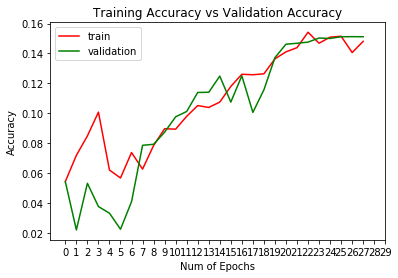

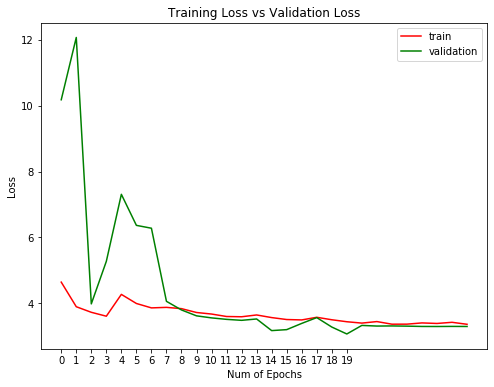

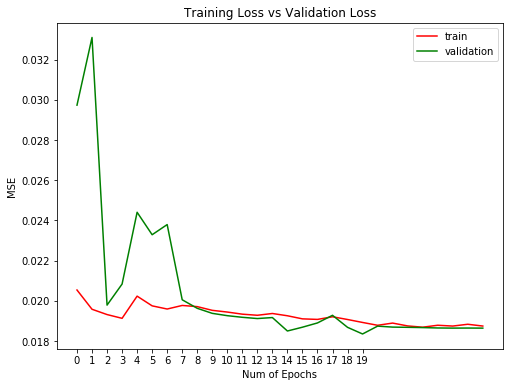

In [0]:
#Inception v3 (no aug, with intermediate layers)
plt.figure(0) 
plt.plot(model_history.history['acc'],'r')
plt.plot(model_history.history['val_acc'],'g')
plt.xticks(np.arange(0, 30, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(model_history.history['loss'],'r')
plt.plot(model_history.history['val_loss'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.figure(2)
plt.plot(model_history.history['mean_squared_error'],'r')
plt.plot(model_history.history['val_mean_squared_error'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("MSE")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show()

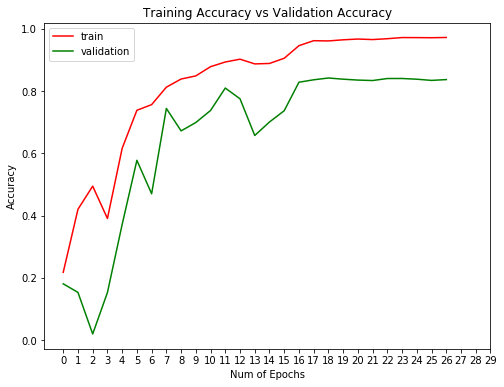

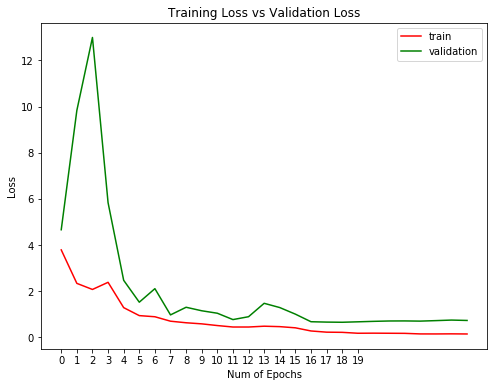

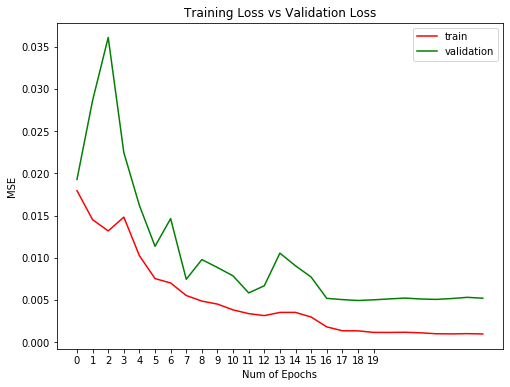

In [0]:
#Inception v3 (no aug, with intermediate layers)
plt.figure(0) 
plt.plot(model_history.history['acc'],'r')
plt.plot(model_history.history['val_acc'],'g')
plt.xticks(np.arange(0, 30, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(model_history.history['loss'],'r')
plt.plot(model_history.history['val_loss'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.figure(2)
plt.plot(model_history.history['mean_squared_error'],'r')
plt.plot(model_history.history['val_mean_squared_error'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("MSE")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show()

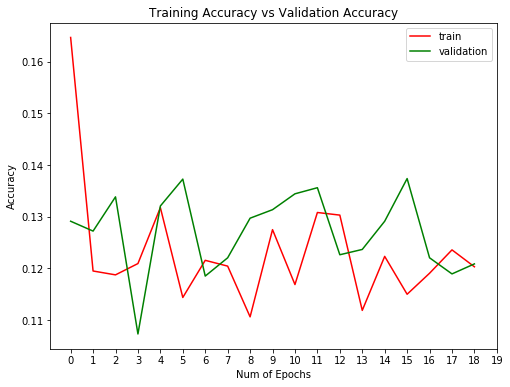

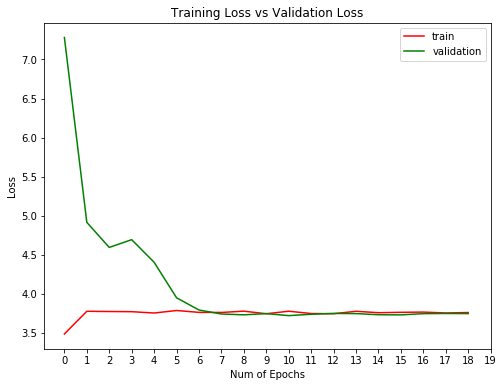

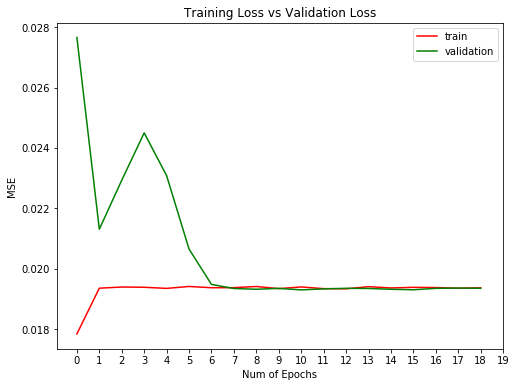

In [0]:
#MobileNetv1
plt.figure(0) 
plt.plot(model_history.history['acc'],'r')
plt.plot(model_history.history['val_acc'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(model_history.history['loss'],'r')
plt.plot(model_history.history['val_loss'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.figure(2)
plt.plot(model_history.history['mean_squared_error'],'r')
plt.plot(model_history.history['val_mean_squared_error'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("MSE")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show()

In [0]:
-914+635+94+185

0

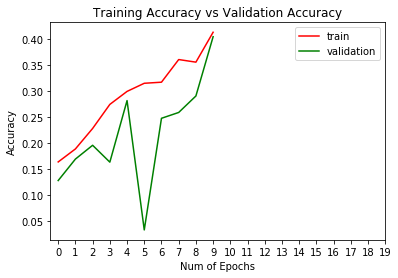

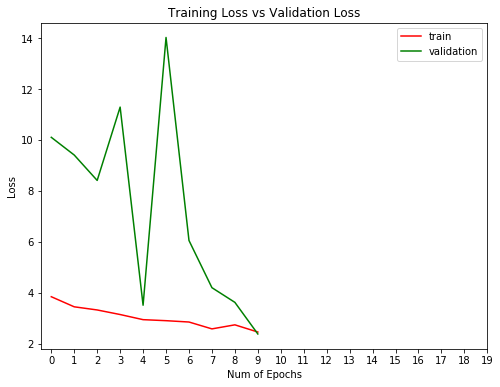

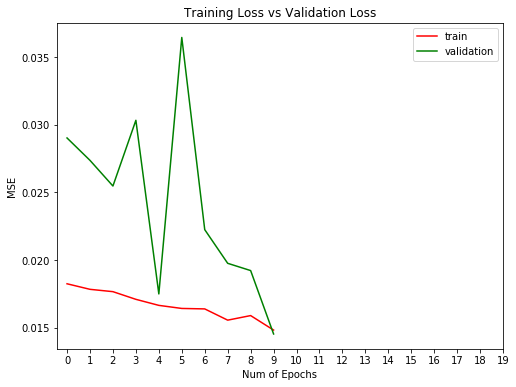

In [0]:
#inception v3
plt.figure(0) 
plt.plot(model_history.history['acc'],'r')
plt.plot(model_history.history['val_acc'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(model_history.history['loss'],'r')
plt.plot(model_history.history['val_loss'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.figure(2)
plt.plot(model_history.history['mean_squared_error'],'r')
plt.plot(model_history.history['val_mean_squared_error'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("MSE")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show()

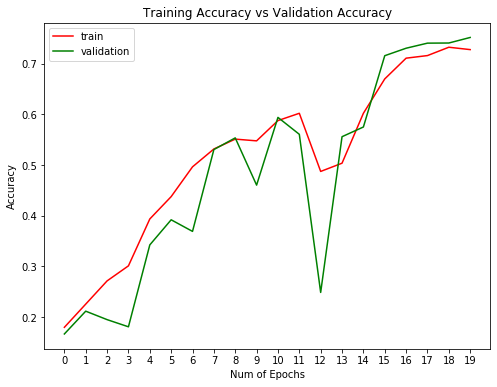

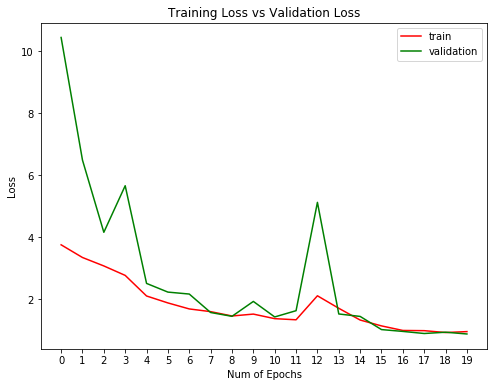

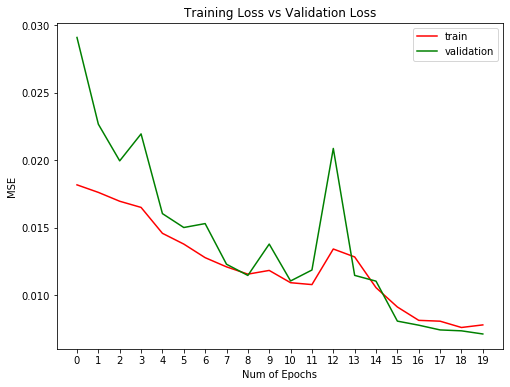

In [0]:
#inception v3
plt.figure(0) 
plt.plot(model_history.history['acc'],'r')
plt.plot(model_history.history['val_acc'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(model_history.history['loss'],'r')
plt.plot(model_history.history['val_loss'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.figure(2)
plt.plot(model_history.history['mean_squared_error'],'r')
plt.plot(model_history.history['val_mean_squared_error'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("MSE")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show()

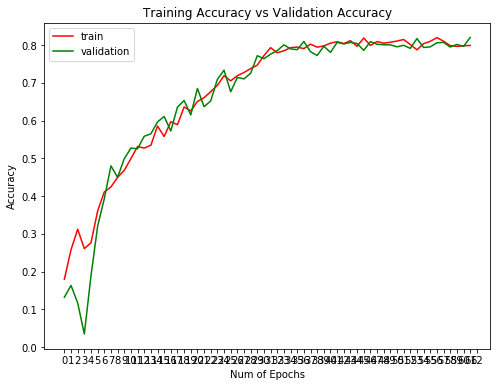

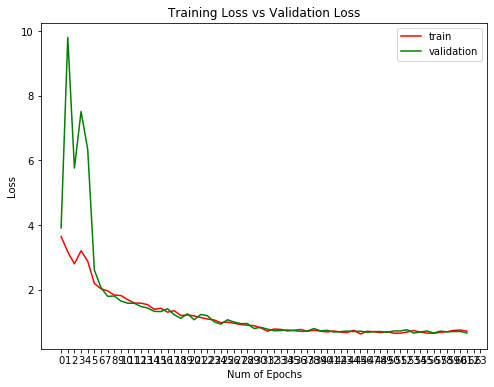

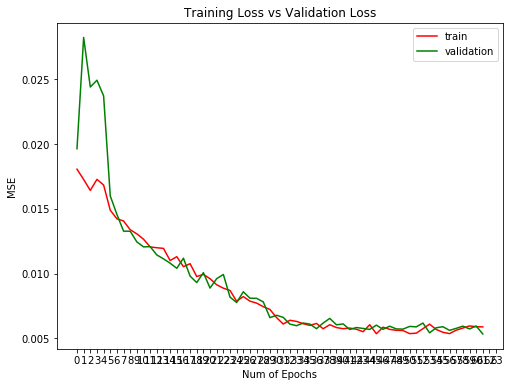

In [0]:
#inception v3
plt.figure(0) 
plt.plot(model_history.history['acc'],'r')
plt.plot(model_history.history['val_acc'],'g')
plt.xticks(np.arange(0, 63, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(model_history.history['loss'],'r')
plt.plot(model_history.history['val_loss'],'g')
plt.xticks(np.arange(0, 64, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.figure(2)
plt.plot(model_history.history['mean_squared_error'],'r')
plt.plot(model_history.history['val_mean_squared_error'],'g')
plt.xticks(np.arange(0, 64, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("MSE")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show()

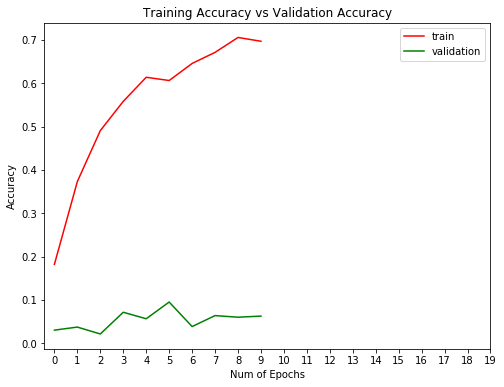

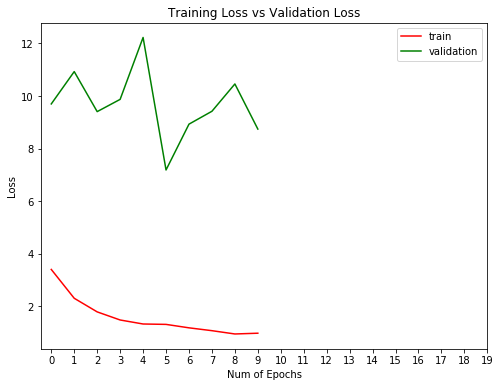

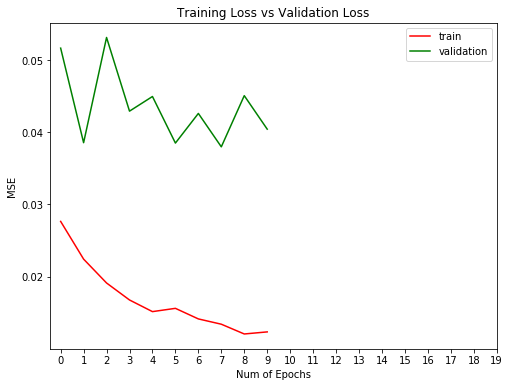

In [0]:
#ResNet
plt.figure(0) 
plt.plot(model_history.history['acc'],'r')
plt.plot(model_history.history['val_acc'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(model_history.history['loss'],'r')
plt.plot(model_history.history['val_loss'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.figure(2)
plt.plot(model_history.history['mean_squared_error'],'r')
plt.plot(model_history.history['val_mean_squared_error'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("MSE")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show()

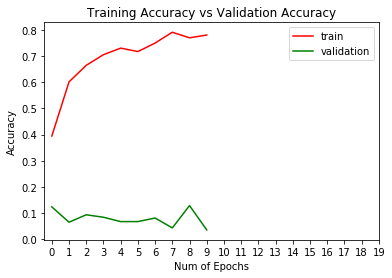

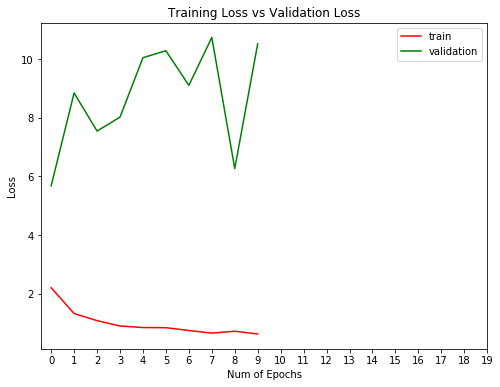

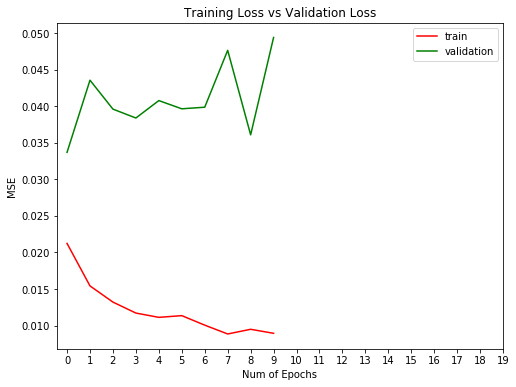

In [0]:
#Inception v4
plt.figure(0) 
plt.plot(model_history.history['acc'],'r')
plt.plot(model_history.history['val_acc'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(model_history.history['loss'],'r')
plt.plot(model_history.history['val_loss'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.figure(2)
plt.plot(model_history.history['mean_squared_error'],'r')
plt.plot(model_history.history['val_mean_squared_error'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("MSE")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show()

In [0]:
# #Load the data set
# #X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# # Normalize image vectors
# X_train = X_train_orig/255.
# X_test = X_test_orig/255.

# # Convert training and test labels to one hot matrice s
# Y_train = convert_to_one_hot(Y_train_orig, 6).T
# Y_test = convert_to_one_hot(Y_test_orig, 6).T

# print ("number of training examples = " + str(X_train.shape[0]))
# print ("number of test examples = " + str(X_test.shape[0]))
# print ("X_train shape: " + str(X_train.shape))
# print ("Y_train shape: " + str(Y_train.shape))
# print ("X_test shape: " + str(X_test.shape))
# print ("Y_test shape: " + str(Y_test.shape))

In [0]:
# img_height,img_width = 64,64 
# #num_classes = 49
# #If imagenet weights are being loaded, 
# #input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))


In [0]:
# preds = model.evaluate(train_datagen, test_datagen)
# print ("Loss = " + str(preds[0]))
# print ("Test Accuracy = " + str(preds[1]))

In [0]:
model.summary()

In [0]:
from keras.models import Sequential
from scipy.misc import imread
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
import pandas as pd

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.applications.vgg16 import decode_predictions
train=pd.read_csv("R/Data/Train/train.csv")
test=pd.read_csv("R/Data/test.csv")
train_path="R/Data/Train/Images/train/"
test_path="R/Data/Train/Images/test/"
r'D:\Praxis docs\capstone\OCR\rahul_results\results'
from scipy.misc import imresize
# preparing the train dataset

train_img=[]
for i in range(len(train)):

    temp_img=image.load_img(train_path+train['filename'][i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)

#converting train images to array and applying mean subtraction processing

train_img=np.array(train_img)
train_img=preprocess_input(train_img)
# applying the same procedure with the test dataset

test_img=[]
for i in range(len(test)):

    temp_img=image.load_img(test_path+test['filename'][i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)

test_img=np.array(test_img)
test_img=preprocess_input(test_img)

# loading VGG16 model weights
model = VGG16(weights='imagenet', include_top=False)
# Extracting features from the train dataset using the VGG16 pre-trained model

features_train=model.predict(train_img)
# Extracting features from the train dataset using the VGG16 pre-trained model

features_test=model.predict(test_img)

# flattening the layers to conform to MLP input

train_x=features_train.reshape(49000,25088)
# converting target variable to array

train_y=np.asarray(train['label'])
# performing one-hot encoding for the target variable

train_y=pd.get_dummies(train_y)
train_y=np.array(train_y)
# creating training and validation set

from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)

 

# creating a mlp model
from keras.layers import Dense, Activation
model=Sequential()

model.add(Dense(1000, input_dim=25088, activation='relu',kernel_initializer='uniform'))
keras.layers.core.Dropout(0.3, noise_shape=None, seed=None)

model.add(Dense(500,input_dim=1000,activation='sigmoid'))
keras.layers.core.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(150,input_dim=500,activation='sigmoid'))
keras.layers.core.Dropout(0.2, noise_shape=None, seed=None)

model.add(Dense(units=10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

# fitting the model 

model.fit(X_train, Y_train, epochs=20, batch_size=128,validation_data=(X_valid,Y_valid))

